# Face bounding box detection

# Setup

In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from scipy.spatial import distance
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from sklearn.linear_model import LinearRegression

# Load imag

In [2]:
img_g = cv2.imread('filter_0_applied_1_11.jpg',0)

In [3]:
img_g

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [4]:
cv2.imshow('image',img_g)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Draw image function

In [5]:
def plot_img(img):
    plt.figure(figsize = (15,7))
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

# Convert to Binary values

In [6]:
(thresh, im_bw) = cv2.threshold(img_g, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img = cv2.threshold(img_g, thresh, 255, cv2.THRESH_BINARY)[1]
img_original =img.copy()

In [7]:
np.unique(im_bw)

array([  0, 255], dtype=uint8)

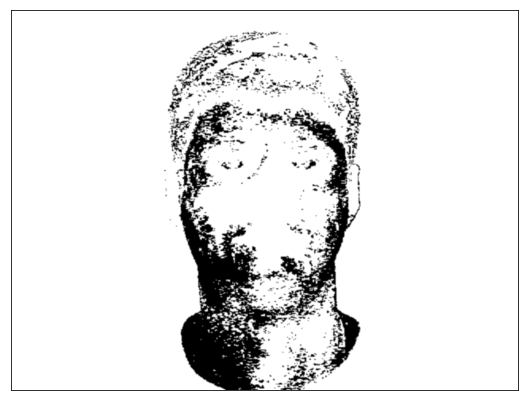

In [30]:
plot_img(img)

# Mean of image based on Java code

In [9]:
mean_x = 323 
mean_y = 269

In [10]:
img[mean_x][mean_y] = 0

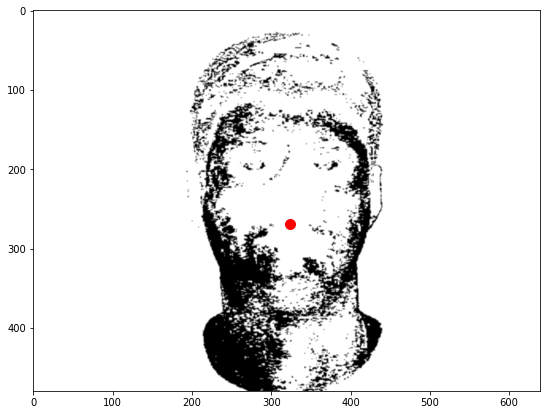

In [11]:
plt.figure(figsize = (15,7))
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
plt.show()

# Dilation and Erosion

In [12]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)

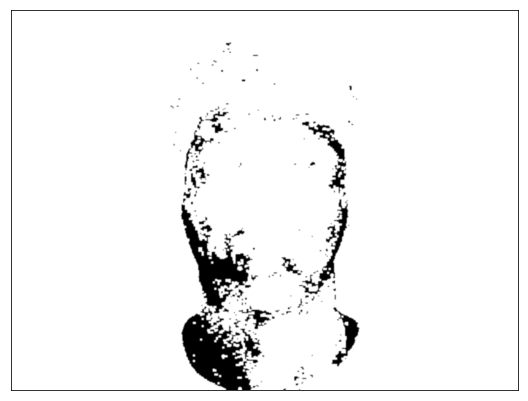

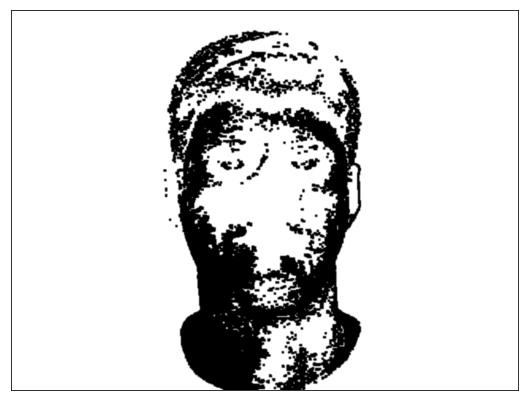

(None, None)

In [13]:
plot_img(dilation), plot_img(erosion)

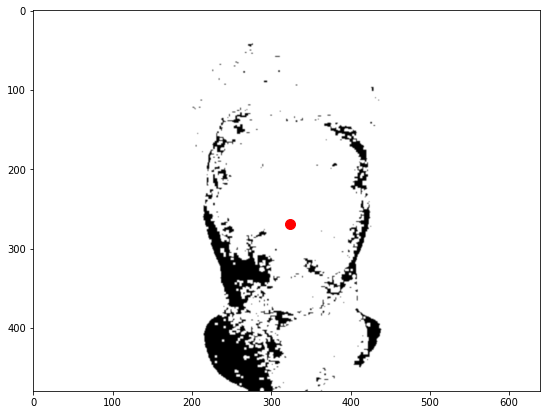

In [14]:
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
plt.show()

# Draw Contour of Dialated image

In [15]:
# imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(dilation,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
#draw all the contours in an image:
cv2.drawContours(dilation, contours, -1, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
# draw an individual contour, say 4th contour:
cv2.drawContours(dilation, contours, 3, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
cnt = contours[4]
cv2.drawContours(dilation, [cnt], 0, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

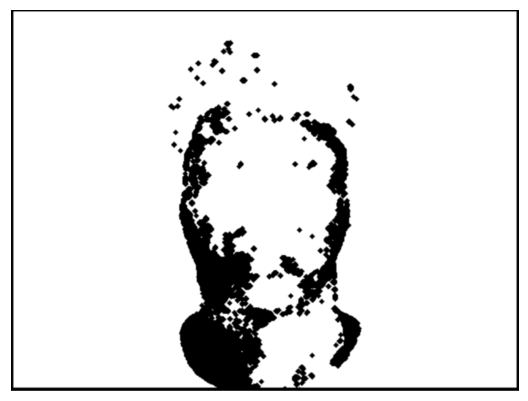

In [19]:
contour_img = cv2.drawContours(dilation, contours, -1, (0,255,0), 3)
plot_img(contour_img)

# Apply dilation 4 times to get rid of noisy pixels

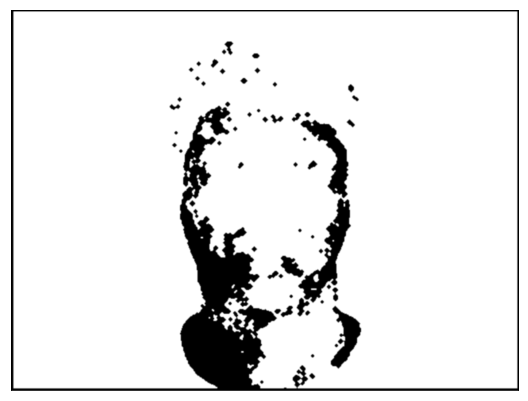

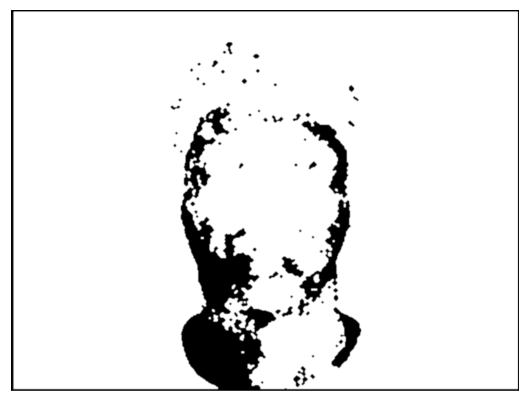

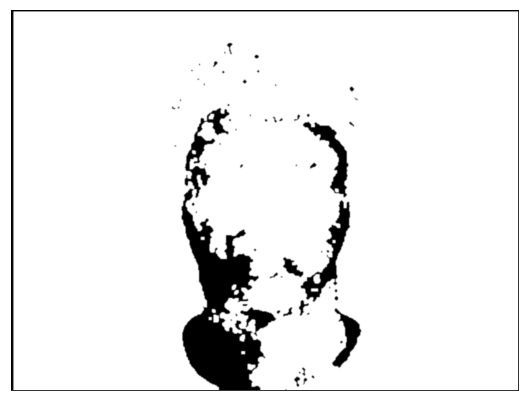

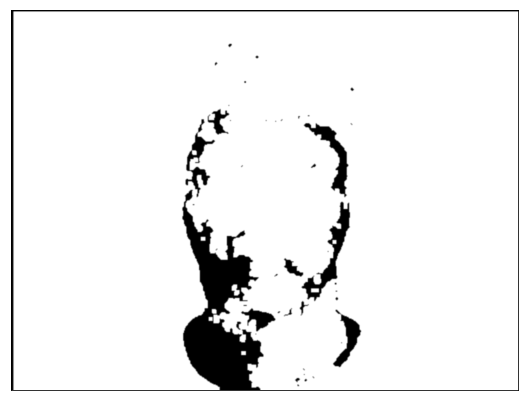

In [20]:
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(contour_img,kernel,iterations = 1)
plot_img(dilation)

dilation = cv2.dilate(dilation,kernel,iterations = 1)
plot_img(dilation)

dilation = cv2.dilate(dilation,kernel,iterations = 1)
plot_img(dilation)

dilation = cv2.dilate(dilation,kernel,iterations = 1)
plot_img(dilation)

# move in every direction from the located mean point

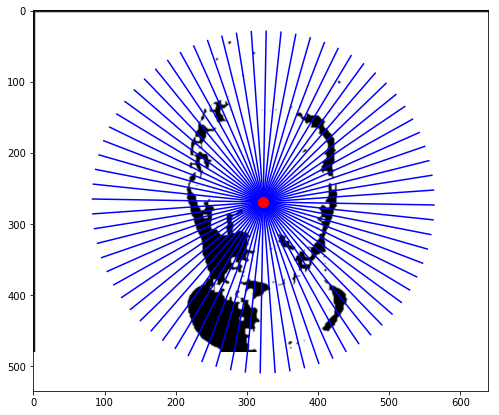

In [21]:
import math
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")

for rotation in range(1,360,5):
    radius =  min(len(dilation), len(dilation[0]))//2
    #print("temp rotation = ", rotation)
    endX = mean_x + radius * math.cos(rotation/180*math.pi)
    endY = mean_y + radius * math.sin(rotation/180*math.pi)
    #print("endX, endY = ", endX, ", ", endY)
    plt.plot([mean_x, endX], [mean_y, endY],  color="blue")
plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
plt.show()

# calculate intersection and take the nearest point to the mean

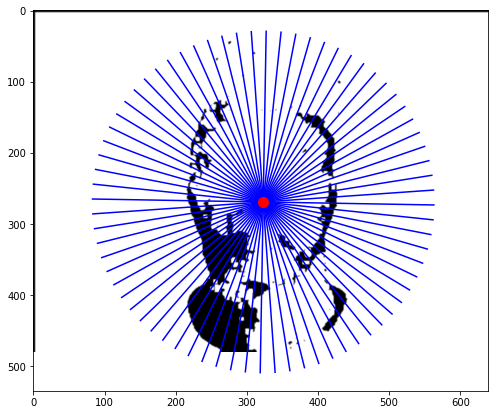

In [22]:
import math
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
# plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
nearest_points = []

for rotation in range(1,360,5):
    radius = min(len(dilation), len(dilation[0]))//2 
    #print("temp rotation = ", rotation)
    endX = mean_x + radius * math.cos(rotation/180*math.pi)
    endY = mean_y + radius * math.sin(rotation/180*math.pi)
    #print("endX, endY = ", endX, ", ", endY)
    plt.plot([mean_x, endX], [mean_y, endY],  color="blue")
    
    image = dilation.copy()
    image.fill(255)
    lineThickness = 1
    line_cv = cv2.line(image, (mean_x, mean_y), ((int)(endX), (int)(endY)), 0, lineThickness)
    
    img_bwa = cv2.bitwise_or(line_cv,dilation)
    
    x_intersection, y_intersection = np.where(img_bwa == 0)
    coords = [(xx, yy) for (xx, yy) in zip(x_intersection, y_intersection)]
    
    if len(coords) > 0:
        X = [(mean_x, mean_y)]
        all_dist = distance.cdist(X, coords, 'euclidean')
        nearest_points.append(coords[np.argmin(all_dist)])

plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
plt.show()

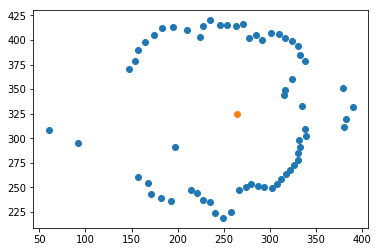

In [23]:
x,y = zip(*nearest_points)
x = np.array(x)
y = np.array(y)
plt.scatter(x, y)
plt.scatter(np.mean(x), np.mean(y))

# Prepare data

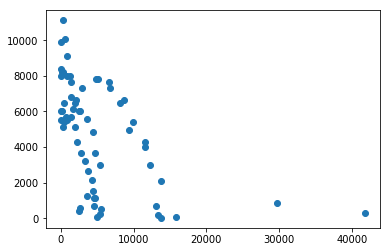

In [24]:
df_orig = pd.DataFrame()
df_orig['x'] = (np.array(x) -np.mean(x))**2
df_orig['y'] = (np.array(y) -np.mean(y))**2

df_orig['xx'] = np.array(x) 
df_orig['yy'] = np.array(y) 

plt.scatter(df_orig['x'], df_orig['y'] )

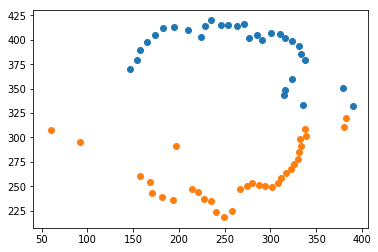

In [25]:
idx_half = np.where(y > np.mean(y))
x_half = np.array(x)[idx_half]
y_half = np.array(y)[idx_half]

x_y_above = (x_half -np.mean(x))**2
y_y_above = (y_half -np.mean(y))**2
plt.scatter(x_half, y_half)

idx_half = np.where(y < np.mean(y))
x_half = np.array(x)[idx_half]
y_half = np.array(y)[idx_half]

x_y_below = (x_half -np.mean(x))**2
y_y_below = (y_half -np.mean(y))**2
plt.scatter(x_half, y_half)

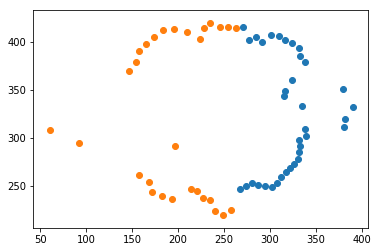

In [26]:
idx_half = np.where(x > np.mean(x))
x_half = np.array(x)[idx_half]
y_half = np.array(y)[idx_half]

x_x_above = (x_half -np.mean(x))**2
y_x_above = (y_half -np.mean(y))**2

plt.scatter(x_half, y_half)


idx_half = np.where(x < np.mean(x))
x_half = np.array(x)[idx_half]
y_half = np.array(y)[idx_half]

x_x_below = (x_half -np.mean(x))**2
y_x_below = (y_half -np.mean(y))**2

plt.scatter(x_half, y_half)

# Regression, find the ellipse

In [42]:
def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
        
        
def fit_regression_ellipse(x, y, orig_x, orig_y, mean_x, mean_y):
    df =pd.DataFrame()
    df['x'] = x
    df['y'] = y
    
    lin_reg = LinearRegression()
    lin_reg.fit(X=df['x'].values[:, np.newaxis], y=df['y'].values[:, np.newaxis])
    df['y_pred'] = lin_reg.predict(df['x'].values[:, np.newaxis])

    df[['y_pred', 'x']].plot(x='x', color='r', figsize = (7,4))
    plt.scatter(df['x'].values, df['y'].values, color='b')
   
    plt.show()
    
    x_draw = np.linspace(np.min(orig_x)-50, np.max(orig_x)+50, 1000)
    y_draw = np.linspace(np.min(orig_y)-50,np.max(orig_y)+50, 1000)
    x_draw, y_draw = np.meshgrid(x_draw, y_draw)

    plt.figure(figsize = (7,4))
    intercept = lin_reg.intercept_
    slope = lin_reg.coef_
    a = -intercept/ slope
    b = intercept
    plt.scatter(np.mean(orig_x), np.mean(orig_y))
    plt.contour(x_draw, y_draw,(((x_draw - np.mean(orig_x))**2)/(a) + (((y_draw - np.mean(orig_y)))**2)/(b)), [1], colors='k')
    plt.scatter(orig_x, orig_y)
    plt.show()
    
    plt.figure(figsize = (12,5))
    plt.imshow(img_original, cmap = 'gray', interpolation = 'bicubic')
    # plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")

    min_x = mean_x - np.sqrt(np.abs(a))
    max_x = mean_x + np.sqrt(np.abs(a))
    min_y = mean_y - np.sqrt(np.abs(b))
    max_y = mean_y + np.sqrt(np.abs(b))

    dd = dilation.copy()
    # dd.fill(0)
    rect_bound = cv2.rectangle(dd,(min_x,min_y),(max_x,max_y),0,0)
    plt.imshow(rect_bound, cmap = 'gray',interpolation = 'bicubic')
    plt.show()
    

---------------

###########################
##########original#########
###########################


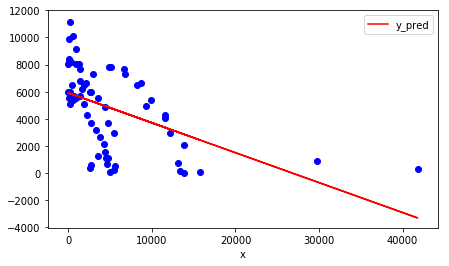

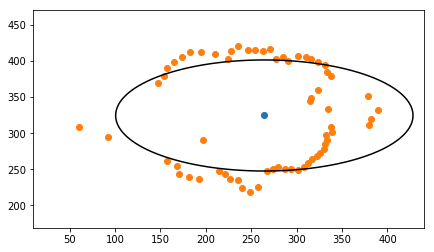

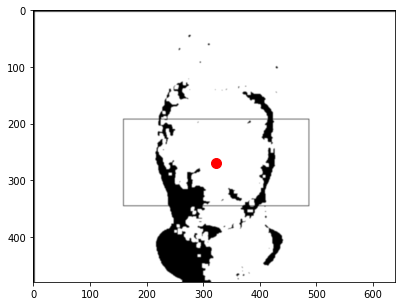

In [43]:
print('###########################')
print('##########original#########')
print('###########################')
fit_regression_ellipse(df_orig['x'].values, df_orig['y'].values,  df_orig['xx'].values, df_orig['yy'].values, mean_x, mean_y)


###########################
##### y < np.mean(y) ######
###########################


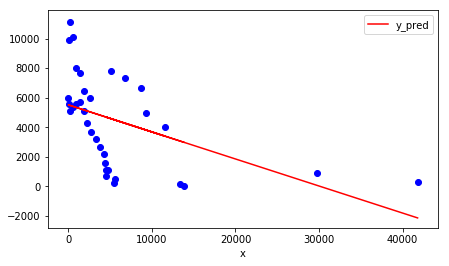

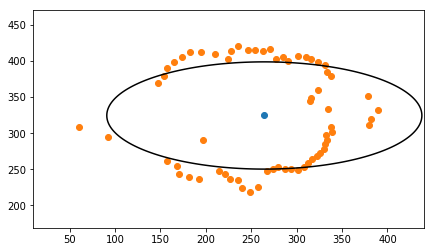

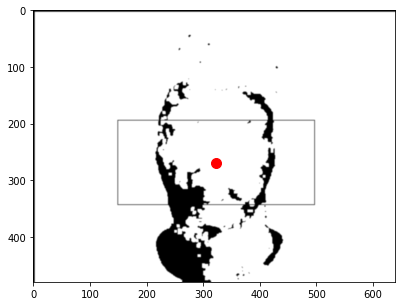

In [44]:
print('###########################')
print('##### y < np.mean(y) ######')
print('###########################')
fit_regression_ellipse(x_y_below, y_y_below,  df_orig['xx'].values, df_orig['yy'].values,mean_x, mean_y)

###########################
##### y > np.mean(y) ######
###########################


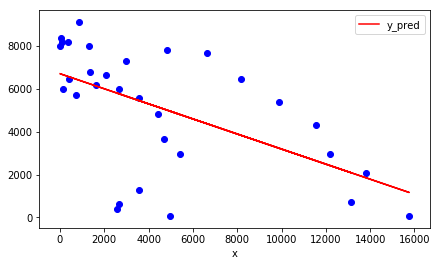

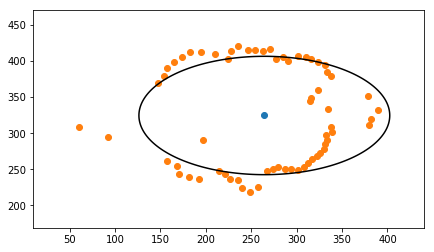

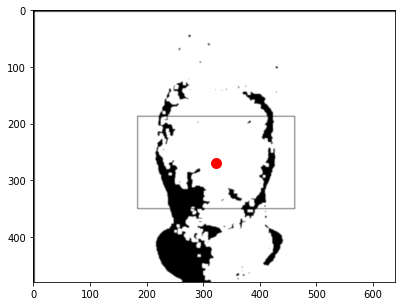

In [45]:
print('###########################')
print('##### y > np.mean(y) ######')
print('###########################')
fit_regression_ellipse(x_y_above, y_y_above,  df_orig['xx'].values, df_orig['yy'].values, mean_x, mean_y)

###########################
##### x < np.mean(x) ######
###########################


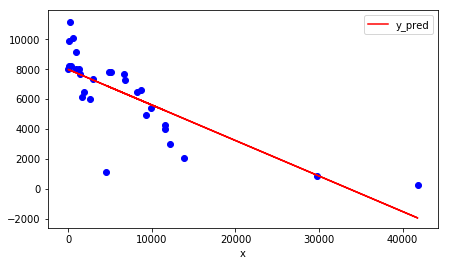

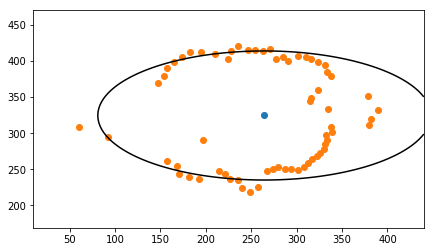

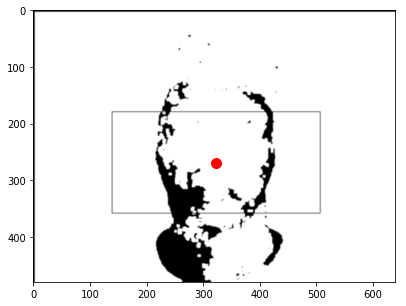

In [46]:
print('###########################')
print('##### x < np.mean(x) ######')
print('###########################')
fit_regression_ellipse(x_x_below, y_x_below,  df_orig['xx'].values, df_orig['yy'].values, mean_x, mean_y)

###########################
##### x > np.mean(x) ######
###########################


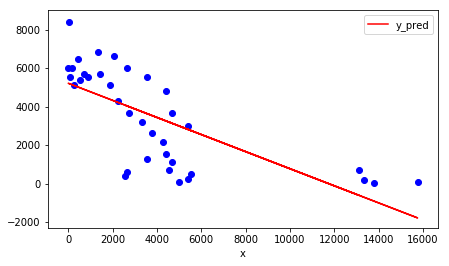

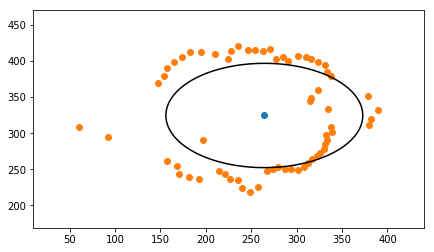

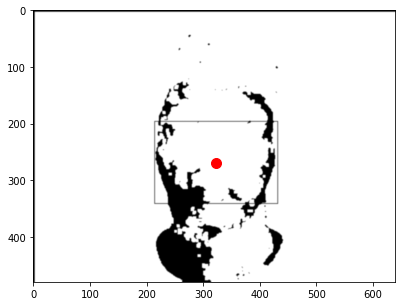

In [47]:
print('###########################')
print('##### x > np.mean(x) ######')
print('###########################')
fit_regression_ellipse(x_x_above, y_x_above,  df_orig['xx'].values, df_orig['yy'].values, mean_x, mean_y)

-----------------

# Remove outliers

In [48]:
def reject_outliers(data, m=2):
    return abs(data - np.mean(data)) < m * np.std(data)

In [53]:
def idx_reject_outliers(x, y):
    idx_reject_1 = reject_outliers(x)
    idx_reject_2 = reject_outliers(y)
    idx_reject = np.bitwise_and(idx_reject_1, idx_reject_2)
    return idx_reject

-----------

In [49]:
idx_reject_1 = reject_outliers(df_orig['x'].values)
idx_reject_2 = reject_outliers(df_orig['y'].values)
idx_reject = np.bitwise_and(idx_reject_1, idx_reject_2)

[]

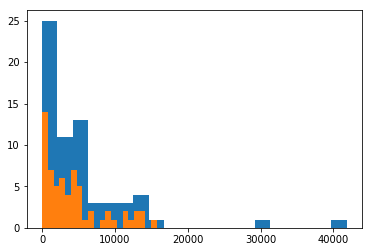

In [50]:
plt.figure(figsize=(6,4))
plt.hist(df_orig['x'], bins =20), plt.hist(df_orig[idx_reject_1]['x'], bins =20) 
plt.plot()

[]

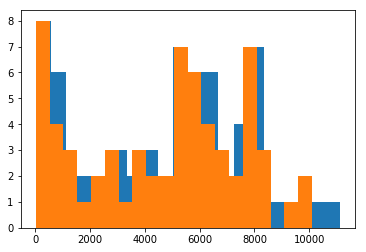

In [51]:
plt.figure(figsize=(6,4))
plt.hist(df_orig['y'], bins =20), plt.hist(df_orig[idx_reject_2]['y'], bins =20) 
plt.plot()

###########################
##########original#########
###########################


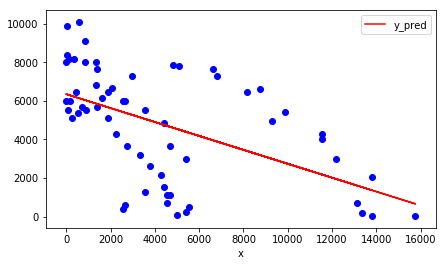

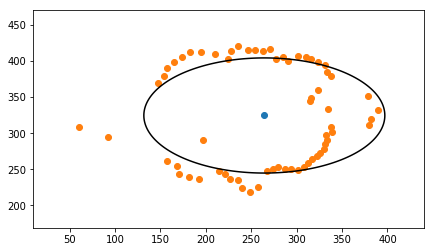

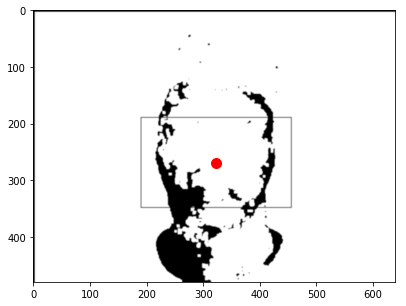

In [55]:
print('###########################')
print('##########original#########')
print('###########################')

idx_reject = idx_reject_outliers(df_orig['x'].values, df_orig['y'].values)
fit_regression_ellipse(df_orig[idx_reject]['x'].values, df_orig[idx_reject]['y'].values,  df_orig['xx'].values, df_orig['yy'].values, mean_x, mean_y)

###########################
##### y < np.mean(y) ######
###########################


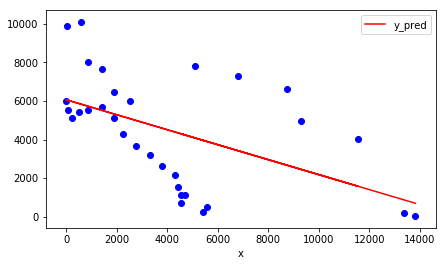

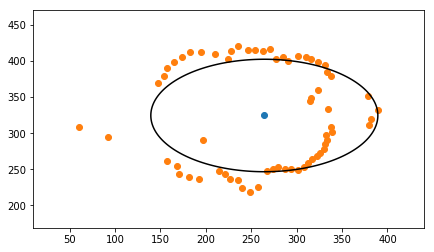

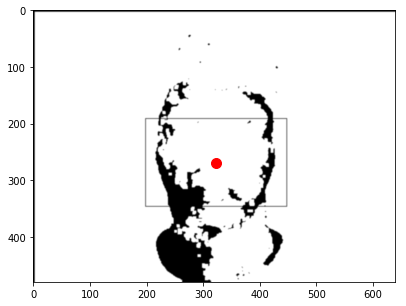

In [56]:
print('###########################')
print('##### y < np.mean(y) ######')
print('###########################')

idx_reject = idx_reject_outliers(x_y_below, y_y_below)
fit_regression_ellipse(x_y_below[idx_reject], y_y_below[idx_reject],  df_orig['xx'].values, df_orig['yy'].values,mean_x, mean_y)

###########################
##### y > np.mean(y) ######
###########################


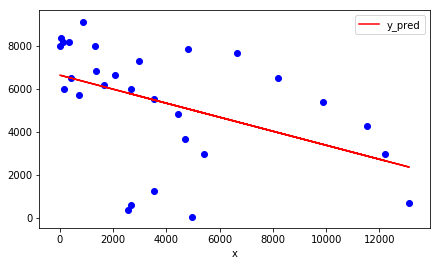

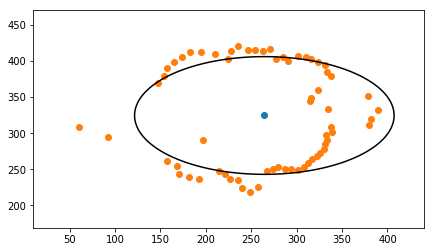

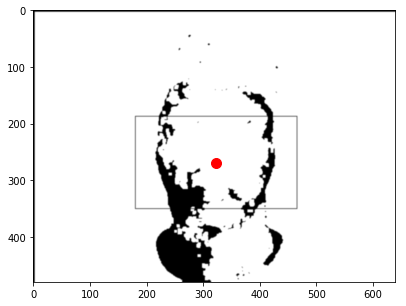

In [57]:
print('###########################')
print('##### y > np.mean(y) ######')
print('###########################')

idx_reject = idx_reject_outliers(x_y_above, y_y_above)
fit_regression_ellipse(x_y_above[idx_reject], y_y_above[idx_reject],  df_orig['xx'].values, df_orig['yy'].values, mean_x, mean_y)

###########################
##### x < np.mean(x) ######
###########################


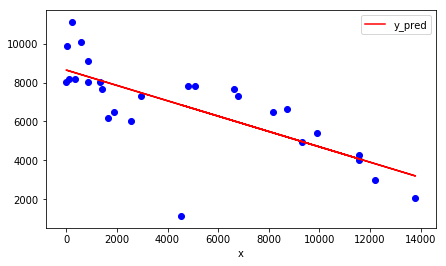

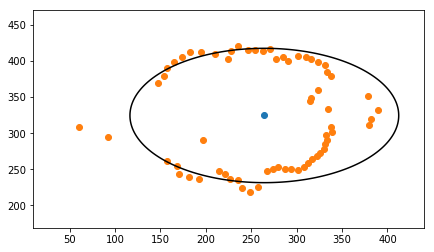

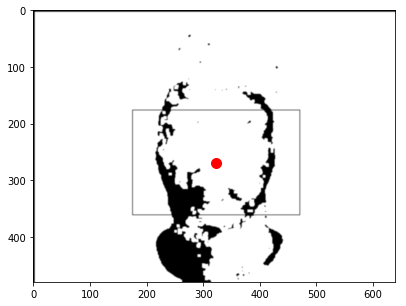

In [58]:
print('###########################')
print('##### x < np.mean(x) ######')
print('###########################')

idx_reject = idx_reject_outliers(x_x_below, y_x_below)
fit_regression_ellipse(x_x_below[idx_reject], y_x_below[idx_reject],  df_orig['xx'].values, df_orig['yy'].values, mean_x, mean_y)

###########################
##### x > np.mean(x) ######
###########################


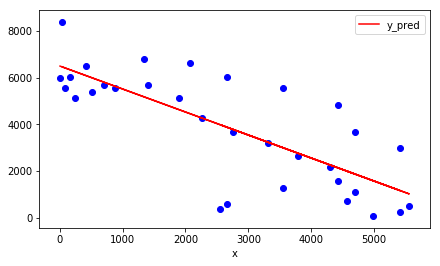

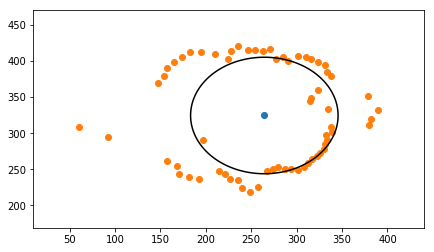

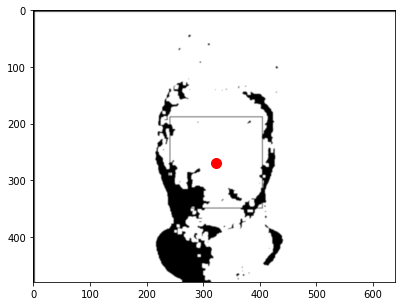

In [59]:
print('###########################')
print('##### x > np.mean(x) ######')
print('###########################')

idx_reject = idx_reject_outliers(x_x_above, y_x_above)
fit_regression_ellipse(x_x_above[idx_reject], y_x_above[idx_reject],  df_orig['xx'].values, df_orig['yy'].values, mean_x, mean_y)

--------------

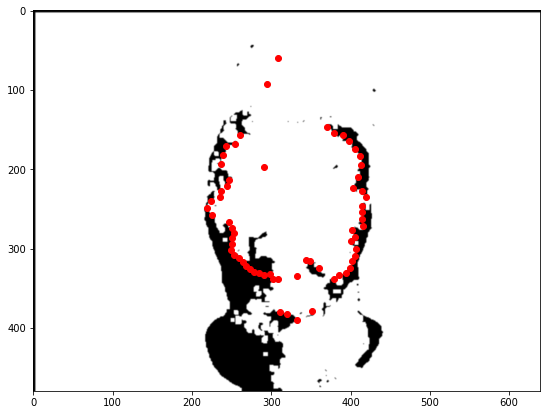

In [60]:
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
x,y = zip(*nearest_points)
plt.scatter(y, x, color ="red" )
plt.show()

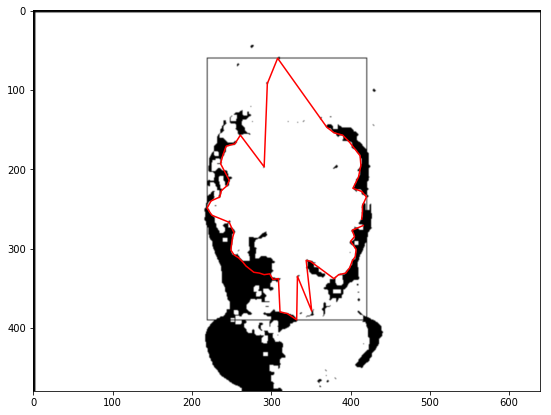

In [62]:
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
y,x = zip(*nearest_points)
plt.plot(x,y, markersize=10, color="red" )

min_x = np.min(x)
max_x = np.max(x)
min_y = np.min(y)
max_y = np.max(y)

dd = dilation.copy()
# dd.fill(0)
rect_bound = cv2.rectangle(dd,(min_x,min_y),(max_x,max_y),0,0)
plt.imshow(rect_bound, cmap = 'gray',interpolation = 'bicubic')
plt.show()

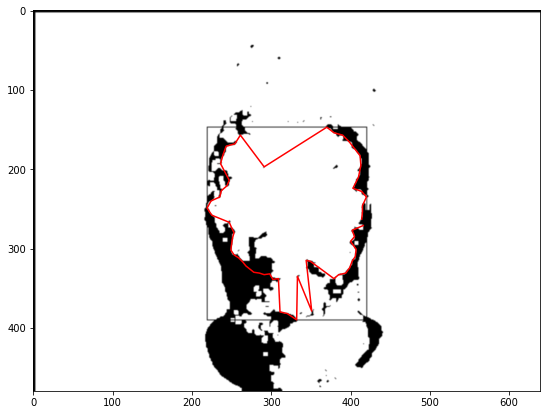

In [71]:
plt.figure(figsize = (15,7))
idx_reject = idx_reject_outliers(x, y)

xx = np.array(x)[idx_reject]
yy = np.array(y)[idx_reject]
plt.plot(xx,yy, markersize=10, color="red" )

min_x = np.min(xx)
max_x = np.max(xx)
min_y = np.min(yy)
max_y = np.max(yy)

dd = dilation.copy()
# dd.fill(0)
rect_bound = cv2.rectangle(dd,(min_x,min_y),(max_x,max_y),0,0)
plt.imshow(rect_bound, cmap = 'gray',interpolation = 'bicubic')
plt.show()

---------------

In [72]:
laplacian = cv2.Laplacian(dilation,cv2.CV_64F)

In [73]:
cv2.imshow('image',laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()